In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import time

In [2]:
 #Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Reshape the data to match the input shape of AlexNet
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

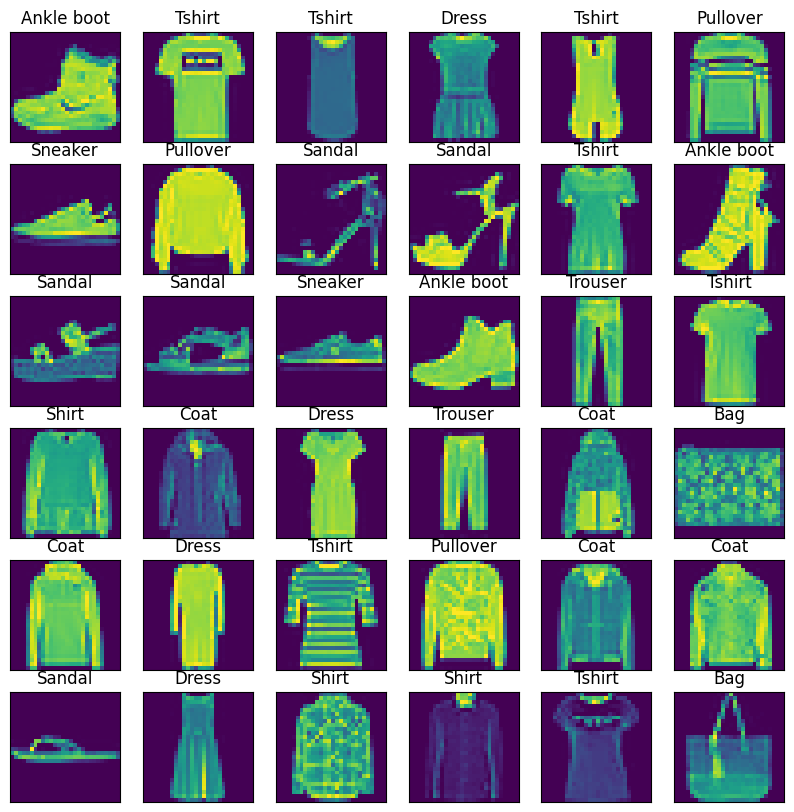

In [7]:
class_names= ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index= int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

In [8]:
# Define the modified AlexNet architecture for 28x28 images
def create_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),

        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),

        layers.Dense(10, activation='softmax')
    ])

    return model

In [9]:
# Create an instance of the model
model = create_alexnet()

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       221440    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                        

In [12]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
750/750 [==============================] - 37s 28ms/step - loss: 2.4802 - accuracy: 0.7933 - val_loss: 0.7968 - val_accuracy: 0.8452
Epoch 2/10
750/750 [==============================] - 21s 28ms/step - loss: 0.5540 - accuracy: 0.8789 - val_loss: 0.4831 - val_accuracy: 0.8800
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 0.4389 - accuracy: 0.8950 - val_loss: 0.4649 - val_accuracy: 0.8814
Epoch 4/10
750/750 [==============================] - 21s 28ms/step - loss: 0.3838 - accuracy: 0.9071 - val_loss: 0.3640 - val_accuracy: 0.9104
Epoch 5/10
750/750 [==============================] - 21s 29ms/step - loss: 0.3546 - accuracy: 0.9148 - val_loss: 0.4094 - val_accuracy: 0.8835
Epoch 6/10
750/750 [==============================] - 21s 28ms/step - loss: 0.3278 - accuracy: 0.9224 - val_loss: 0.4318 - val_accuracy: 0.8789
Epoch 7/10
750/750 [==============================] - 22s 29ms/step - loss: 0.3007 - accuracy: 0.9307 - val_loss: 0.5645 - val_accuracy:

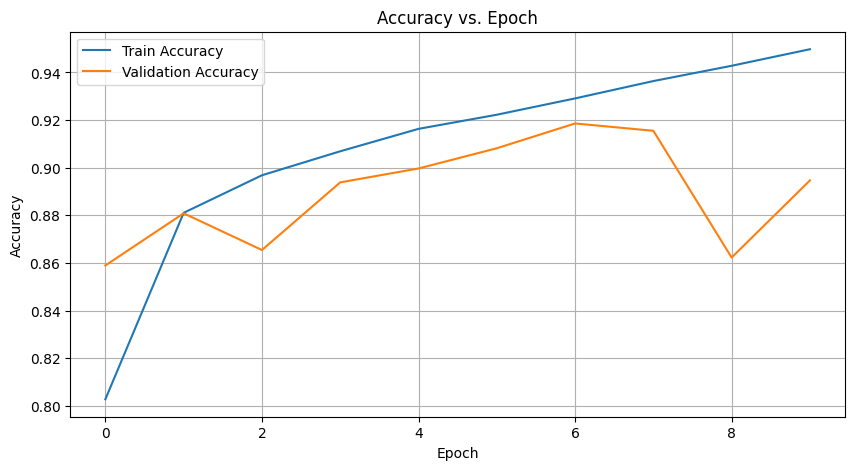

In [ ]:
# Plot accuracy vs. epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions on the test set
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Compute confusion matrix and classification report
confusion = confusion_matrix(test_labels, test_predictions)
classification_rep = classification_report(test_labels, test_predictions)

print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)

313/313 [==============================] - 2s 6ms/step - loss: 0.4108 - accuracy: 0.8902
Test accuracy: 89.02%
313/313 [==============================] - 1s 4ms/step

Confusion Matrix:
[[786   0   9  17   4   1 182   0   1   0]
 [  3 982   0   9   0   0   5   0   1   0]
 [  8   1 602   3 146   0 240   0   0   0]
 [  7   1   9 894  23   0  64   0   2   0]
 [  2   1   7  30 885   0  75   0   0   0]
 [  4   1   0   0   0 964   2  22   1   6]
 [ 47   4  15  16  52   0 862   0   4   0]
 [  0   0   0   0   0   2   0 974   2  22]
 [  5   0   0   1   2   0  12   0 980   0]
 [  0   0   0   0   0   2   1  24   0 973]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.94      0.60      0.73      1000
           3       0.92      0.89      0.91      1000
           4       0.80      0.89      0.84      1000
           5       0.99      0.96  